In [1]:
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import sklearn
import pandas as pd
import os 
import sys
import time
import tensorflow as tf
from tensorflow import keras
from pprint import pprint

print(sys.version_info)
for module in mpl, np, pd, sklearn, tf, keras:
    print(module.__name__, module.__version__)

sys.version_info(major=3, minor=7, micro=5, releaselevel='final', serial=0)
matplotlib 3.1.2
numpy 1.17.4
pandas 0.25.3
sklearn 0.22
tensorflow 2.0.0
tensorflow_core.keras 2.2.4-tf


## 1. 数据的获取与处理

In [2]:
fashion_mnist = keras.datasets.fashion_mnist
(x_train_all, y_train_all), (x_test, y_test) = fashion_mnist.load_data()
x_valid, x_train = x_train_all[:5000], x_train_all[5000:]
y_valid, y_train = y_train_all[:5000], y_train_all[5000:]

In [3]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(
    x_train.astype(np.float32).reshape(-1, 1)).reshape(-1, 28, 28, 1)
x_valid_scaled = scaler.transform(
    x_valid.astype(np.float32).reshape(-1, 1)).reshape(-1, 28, 28, 1)
x_test_scaled = scaler.transform(
    x_test.astype(np.float32).reshape(-1, 1)).reshape(-1, 28, 28, 1)

## 2. 建模与训练

### 2.1【重点】 定义卷积网络

In [4]:
model = keras.models.Sequential()
model.add(keras.layers.Conv2D(filters=32, 
                              kernel_size=3, 
                              padding="same", 
                              activation="selu",
                              input_shape=(28, 28, 1)))  # 1是通道数
model.add(keras.layers.Conv2D(filters=32,
                              kernel_size=3,
                              padding="same",
                              activation="selu"))
model.add(keras.layers.MaxPool2D(pool_size=2))
model.add(keras.layers.Conv2D(filters=64,
                              kernel_size=3,
                              padding="same",
                              activation="selu"))
model.add(keras.layers.Conv2D(filters=64, 
                              kernel_size=3,
                              padding="same",
                              activation="selu"))
model.add(keras.layers.MaxPool2D(pool_size=2))
model.add(keras.layers.Conv2D(filters=128, 
                              kernel_size=3,
                              padding="same",
                              activation="selu"))
model.add(keras.layers.Conv2D(filters=128,
                              kernel_size=3,
                              padding="same",
                              activation="selu"))
model.add(keras.layers.MaxPool2D(pool_size=2))
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(128, activation="selu"))
model.add(keras.layers.Dense(10, activation="softmax"))

In [5]:
model.compile(loss="sparse_categorical_crossentropy",
#               profilesor=10000,
              optimizer="sgd",
              metrics=["accuracy"])

In [6]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 28, 28, 32)        320       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 28, 28, 32)        9248      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 14, 14, 64)        18496     
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 14, 14, 64)        36928     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 7, 7, 64)          0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 7, 7, 128)         7

In [7]:
logdir = "./cnn_selu_callbacks"
if not os.path.exists(logdir):
    os.mkdir(logdir)
    
output_model_file = os.path.join(logdir, "fashion_mnist_model.h5")

callbacks = [keras.callbacks.TensorBoard(logdir, profile_batch=100000000),
             keras.callbacks.ModelCheckpoint(output_model_file, 
                                        save_best_only=True),
             keras.callbacks.EarlyStopping(patience=5, min_delta=1e-2)]

In [8]:
history = model.fit(x_train_scaled, 
                    y_train,
                    epochs=10, 
                    validation_data=(x_valid_scaled, y_valid),
                    callbacks=callbacks)

Train on 55000 samples, validate on 5000 samples
Epoch 1/10
55000/55000 [==============================] - 173s 3ms/sample - loss: 0.4270 - accuracy: 0.8457 - val_loss: 0.3672 - val_accuracy: 0.8646
Epoch 2/10
55000/55000 [==============================] - 170s 3ms/sample - loss: 0.2846 - accuracy: 0.8963 - val_loss: 0.2707 - val_accuracy: 0.9030
Epoch 3/10
55000/55000 [==============================] - 170s 3ms/sample - loss: 0.2351 - accuracy: 0.9156 - val_loss: 0.2510 - val_accuracy: 0.9100
Epoch 4/10
55000/55000 [==============================] - 173s 3ms/sample - loss: 0.2003 - accuracy: 0.9276 - val_loss: 0.2540 - val_accuracy: 0.9106
Epoch 5/10
55000/55000 [==============================] - 174s 3ms/sample - loss: 0.1737 - accuracy: 0.9381 - val_loss: 0.2278 - val_accuracy: 0.9182
Epoch 6/10
55000/55000 [==============================] - 171s 3ms/sample - loss: 0.1467 - accuracy: 0.9479 - val_loss: 0.2205 - val_accuracy: 0.9182
Epoch 7/10
55000/55000 [===========================

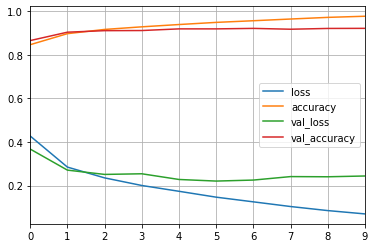

In [9]:
def plot_learning_curves(history):
    pd.DataFrame(history.history).plot(figsize=(6, 4), grid=True)
    plt.show()

plot_learning_curves(history)

In [10]:
model.evaluate(x_test_scaled, y_test)

10000/1 [===============================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

[0.28269895877540113, 0.9129]